# Just analogy about axis and dimensions

In [ ]:
import torch
import numpy as np

In [ ]:
a = torch.randn(5, 7)
a

tensor([[-0.4282,  0.9485,  0.8425,  0.6292, -0.3335,  1.9781,  0.5626],
        [ 1.1583,  0.0748, -0.8749, -1.6196, -0.2865, -0.5775,  0.2026],
        [ 0.2585, -0.4769,  1.0533,  0.6817, -0.1375, -0.0049,  0.2276],
        [ 1.5471,  0.4922, -1.1023, -0.7669,  0.2078, -1.0693, -1.8519],
        [-1.2354, -1.7968,  1.2712,  1.5228, -0.2566,  1.0706,  0.9834]])

In [ ]:
b = torch.max(a, 1)
b

torch.return_types.max(
values=tensor([1.9781, 1.1583, 1.0533, 1.5471, 1.5228]),
indices=tensor([5, 0, 2, 0, 3]))

In [ ]:
c = torch.max(a, 0)
c

torch.return_types.max(
values=tensor([1.5471, 0.9485, 1.2712, 1.5228, 0.2078, 1.9781, 0.9834]),
indices=tensor([3, 0, 4, 4, 3, 0, 4]))

In [ ]:
d = torch.max(a, -2)
d

torch.return_types.max(
values=tensor([1.5471, 0.9485, 1.2712, 1.5228, 0.2078, 1.9781, 0.9834]),
indices=tensor([3, 0, 4, 4, 3, 0, 4]))

In [ ]:
e = torch.max(a, -1)
e

torch.return_types.max(
values=tensor([1.9781, 1.1583, 1.0533, 1.5471, 1.5228]),
indices=tensor([5, 0, 2, 0, 3]))

In [ ]:
x = np.random.randn(3, 5)
x

array([[-1.26915205, -1.94517604,  2.46684453,  1.04302276, -0.16527043],
       [-0.24176999,  0.8802333 ,  0.14639123,  0.54083252,  0.35659931],
       [-0.67393363,  0.70344535, -0.68223949,  1.87107057,  0.02747703]])

In [ ]:
k = x.max(axis=0)
k

array([-0.24176999,  0.8802333 ,  2.46684453,  1.87107057,  0.35659931])

# Pytorch for MNIST Dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("dark_background")

In [ ]:
train_dataset = torchvision.datasets.MNIST(
    root=".",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

In [ ]:
test_dataset = torchvision.datasets.MNIST(
    root=".",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [ ]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [ ]:
type(train_dataset.data)

torch.Tensor

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [ ]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [ ]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=64,
                                               shuffle=True
                                               )
test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                              batch_size=64,
                                              shuffle=False
                                              )

In [ ]:
train_dataloader

In [ ]:
tmp_loader = torch.utils.data.DataLoader(test_dataset,
                                              batch_size=324,
                                              shuffle=False
                                              )

for x, y in tmp_loader:
    print(x)
    print(y)
    print(x.shape)
    print(y.shape)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

* The code below also transorm data.
* However, DataLoader object also internally include that transform.

In [ ]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [ ]:
n_epochs = 10

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

train_accs = np.zeros(n_epochs)
test_accs = np.zeros(n_epochs)

optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

for i in range(n_epochs):

    train_loss = []
    n_correct = 0.
    n_total = 0.
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Reshape data to NxD formatted shape
        inputs = inputs.view(-1, 784)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

        _, pred = torch.max(outputs, 1)
        n_correct += (pred == targets).sum().item()
        n_total += targets.shape[0]
    train_loss = np.mean(train_loss)
    train_acc = n_correct / n_total
    train_accs[i] = train_acc

    test_loss = []
    n_correct = 0.
    n_total = 0.
    for inputs, targets in test_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 784)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())

        _, pred = torch.max(outputs, 1)
        n_correct += (pred == targets).sum().item()
        n_total += targets.shape[0]

    test_loss = np.mean(test_loss)
    test_acc = n_correct / n_total
    test_accs[i] = test_acc

    train_losses[i] = train_loss
    test_losses[i] = test_loss


    print(f"Epochs: {i+1}/{n_epochs} /..................................../ train_loss: {train_loss:.4f}, train_acc: {train_acc:.4f}, test_loss: {test_loss:.4f}, test_acc: {test_acc:.4f}")





Epochs: 1/10 /..................................../ train_loss: 0.3546, train_acc: 0.9027, test_loss: 0.1861, test_acc: 0.9469
Epochs: 2/10 /..................................../ train_loss: 0.1603, train_acc: 0.9538, test_loss: 0.1342, test_acc: 0.9612
Epochs: 3/10 /..................................../ train_loss: 0.1104, train_acc: 0.9682, test_loss: 0.1024, test_acc: 0.9691
Epochs: 4/10 /..................................../ train_loss: 0.0836, train_acc: 0.9750, test_loss: 0.0839, test_acc: 0.9748
Epochs: 5/10 /..................................../ train_loss: 0.0647, train_acc: 0.9811, test_loss: 0.0806, test_acc: 0.9737
Epochs: 6/10 /..................................../ train_loss: 0.0536, train_acc: 0.9841, test_loss: 0.0779, test_acc: 0.9764
Epochs: 7/10 /..................................../ train_loss: 0.0434, train_acc: 0.9867, test_loss: 0.0716, test_acc: 0.9777
Epochs: 8/10 /..................................../ train_loss: 0.0362, train_acc: 0.9894, test_loss: 0.0705, t

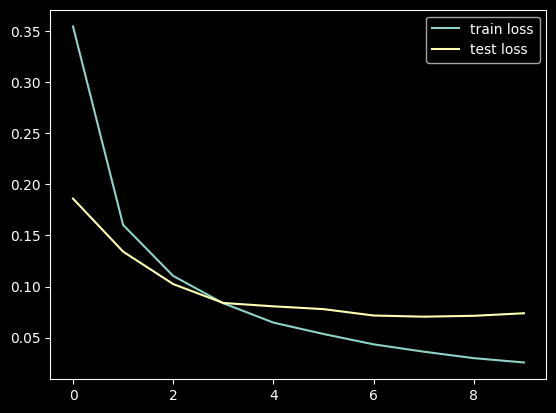

In [ ]:
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()

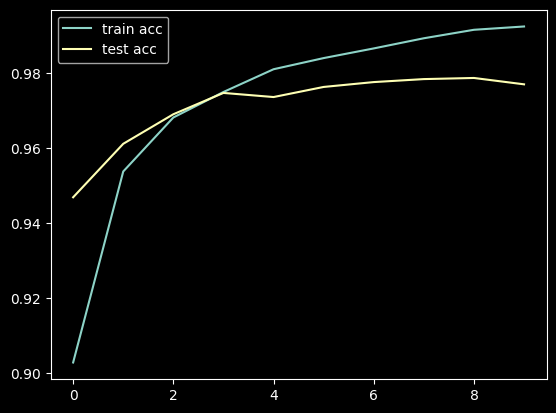

In [ ]:
plt.plot(train_accs, label="train acc")
plt.plot(test_accs, label="test acc")
plt.legend()